<a href="https://colab.research.google.com/github/Halkenhaeusser/CS110-Sovling-Problems-with-Algorithms/blob/main/CS110_Final_Project_Knapsack_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knapsack Problem

The problem itself is analogous to the 1/0 Knapsack Problem as we can imagine our day as our Knapsack that we want to pack as many activities in as possible while maximizing the amount of profit. The day is the sack, and the activity is a stolen good. The cost of each a tivity is unlike in the Knapsack problem the weight, but the time an activity can take. As such that is also what our overarching constraint's unit: time rather than weight capacity. 
We use the 1/0 Knapsack Problem because we cannot do an activity half way and have to include full activities rather than fractional pieces of activities. 

Cormen et al. (2009) agrue for a dynamic programming approach to solve this problem rather than a greedy algorithm. That is because the greedy algorithm's assumption of an optimal local choice contributing to the optimal solution does not hold here because we may not be optimizing our capacity usage. The dynamic programming solution however can with a complexity of $O(n T)$ where n is the number of activities and T is the maximum time we can have in the day.

To solve this strategy we need to break down the activity of scheduling task to whether we can increase our profit if we include a particular task or not. Including a particular activity changes depending on how much capacity has been already used in the schedule and how many a ctivities have been added. However, we have the same case of the e.g. 2 activities being included already and capacity being reduced by 2 hours already, we can memoize these problems to make use of overlapping substructure. 

To create the activity scheduler it would be most helpful to "pack" an activity into one unit, that is an object of class activity. This is more memory efficient than storing them in an array and makes it easy to organize the activities. 

To finally print the activity schedule we can adopt the tracing and printing strategy that was used when reconstructing the longest common subsequence using dynammic programming.

In [ ]:
import numpy as np

class Activity():

    """
    Class: Activity
    Initialize the activity class. 
    Each activity has a name, a length, a unit of length and a profit. 
    """
    def __init__(self, name, length, profit, time_unit = 'min'):
        self.name = name
        self.length = length
        self.time_unit = time_unit
        self.profit = profit
    

In [ ]:
#based on the idea of the LCS_Print function from class 12.1
def getSchedule(trac_map, act, i, j):

    """
    function:   getSchedule
    Input:      - map: the auxiliary matrix from Zero_One_Scheduler
                - act: list of activities give to Zero_One_Scheduler
                - i: tracks rows
                - j: tracks columns
                - schedule: the schedule we repeatedly add to. Initially an empty list.

    Body:       Recursively checking the decision that was made during the scheduling

    Output:     - The finished schedule of activities
                - The total profit (which should be the same as the one we got from the Zero_One_Scheduler)
    """
    schedule = []  
    while i > 0 and j > 0:
        #print("i",i, 'j', j)
        #print('val', trac_map[i][j])
        if trac_map[i][j] == 1:
        #if we added a activity to the schedule 
        #because its combination with previous elements yields higher profit
            schedule.insert(0, act[i - 1].name)
    
            #notice here a change from the LCS tracer:
            #we move by the length of the last activity we have added as it takes up 
            #that much space in the schedule
            #print('reducing j=',j, 'by',act[i - 1].length)
            j -= int(act[i - 1].length) 
            i -= 1

        elif trac_map[i][j] == 2:
        #if we put a pointer of left, we one the aux_memo matrix
        #this occurs when the current activity is too long to be added to the schedule
            i -= 1
            

        elif trac_map[i][j] == 3:
        #when we activity could have been added 
        #but was not more profitable than the previous combination of activities.
            i -= 1

    return schedule

In [ ]:
def Zero_One_Scheduler(T, act_list):

    '''
    function: Zero_One_Scheduler
    Inputs: - T = Maximum time of capacity in minutes
            - act_list: A a list of activities of class Activity. 
    
    Body:   Creates a matrix of subproblems being solved in a bottom up way. 
            At each slot of the matrix we enter the maximum amount of profit
            into the matrix. 
            An auxiliary matrix traces which activities have been addeded to the
            schedule. Through reconstructing the solutions we can create a schedule.

    Output: - The maximum profit to be made. 
            - The time table of tasks. 
    '''

    #get the number of activities
    no_acts = len(act_list)

    #initialize the memoization matrix
    #it's dimensions are the number of activities and the capacity
    #Note that the graininess of activity length therefore contributes majorly to the complexity. 
    #that is if we suddenly wanted to do this with activities that take 1.5 minutes or reduced the
    #unit of activities to hours rather than minutes we drastically change the size of the table. 
    #also note that T and length in the activities have to be integers. 
    #We add an extra row and column to account for the base cases of having no capacity or no activities left.
    memoize_matrix = np.zeros((no_acts + 1, T + 1))

    #create the auxiliary matrix for tracking
    aux_memo = np.zeros((no_acts + 1, T + 1))


    #we start at index 1 because with no_acts = 0 or T = 0 we add nothing
    #i.e. it is zero and the value is already initialized in the table
    for a in range(no_acts + 1):
        for t in range(T + 1):

            if a == 0 or t == 0:
                memoize_matrix[a][t] = 0

            #if the length of the activity we are considering is smaller than the remaining time:
            elif act_list[a - 1].length <= t:
                #see if profit is increased by including it:                
                if act_list[a - 1].profit + memoize_matrix[a - 1][t - act_list[a - 1].length] >= memoize_matrix[a - 1][t]:
                    memoize_matrix[a][t] = act_list[a - 1].profit + memoize_matrix[a - 1][t - act_list[a - 1].length]
                    
                    #denote an addition as 1
                    aux_memo[a][t] = 1

                else:
                    memoize_matrix[a][t] = memoize_matrix[a - 1][t]

                    #denote a previous combination of activities being better than adding this
                    aux_memo[a][t] = 2


            #if the time is too long to fit in the schedule:
            else:
                #add the previous max
                memoize_matrix[a][t] = memoize_matrix[a - 1][t]
                aux_memo[a][t] = 3

    #get the schedule
    activity_list = getSchedule(aux_memo, act_list, no_acts, T)

    #check if the scheduled activities actually sum up to the right profit
    #this is a small check that the schedule tracker works
    traced_profit = 0
    for name in activity_list:
        for act in act_list:
            if name == act.name:
                traced_profit += act.profit
    if traced_profit != memoize_matrix[no_acts][T]:
        return "Error: Schedule Mismatch"

    
    #return the schedule and the bottom right corner of the matrix to get the total profit
    return activity_list, traced_profit
    

Let's run a first test:
We create 3 activities with a cumulative weight that is small enough that we could add them all.
Hence, we expect that all of them are added to the schedule.
(Our day is only 6 hours long here, but that is not an issue considering it is just a test). 

In [ ]:
activities = []
profits = [6, 10, 12] 
times = [1, 2, 3] 

for i in range(3):
    activities.append(Activity(str(i), times[i], profits[i], 'min'))

Zero_One_Scheduler(5, activities)

(['1', '2'], 22)

We see that the total profit is 30 and all tasks were added. That is what we expected and hoped to happen which is means the scheduler works on this simple example. 

We can also make a very inefficient brute force algorithm for this problem to test our solution against: create all the different combinations and check if they are below the capacity and select the one with the highest profit.

In [ ]:
from itertools import combinations

def brute_force_schedule(T, acts):

    #add a non_profit able schedule
    best_schedule = [Activity('no_good_schedule', 0, 0)]

    #for the different numbers of activities in the schedule
    for sched_len in range(1, len(acts) + 1):

        #create all the different combinations (The order does not matter at all)
        possible_schedules = list(combinations(acts, sched_len))

        #for every schedule:
        for sched in possible_schedules:
            
            #check if activities fit short enough
            if sum([a.length for a in sched]) <= T: 

            #update the best schedule if the current schedule has higher profit
                if sum([a.profit for a in sched]) > sum([a.profit for a in best_schedule]):
                    best_schedule = sched

    final_sched = [a.name for a in best_schedule]
    return final_sched, sum([a.profit for a in best_schedule])

In [ ]:
brute_force_schedule(5, activities)

(['1', '2'], 22)

Let's get into some serious testing to see if our algorithm can pass random tests. We will randomly create inputs to our scheduler with constant bounding time. If the DP and the brute force algorithm output the same profit we can be confident in the DP scheduler as the DP scheduler already checks if his outputted schedule is correct by checking its profit. Therefore, through including a check in the DP schedule we check if the schedule outputted is correct for the result of the DP decision criterion and by checking it against the profit of the brute_force algorithm we check if that profit is optimal. 
That is if the profit of the schedule is the profit of the matrix then it is correct. Then if the profit of the brute force is the optimal solution and it is equal to the profit of the matrix, then it is equal to that of the schedule, and the schedule is therefore also correct (i.e. if A = B = C and if C = max, then A = max.

In [ ]:
#let's go for a test and do some experiments along the way:

import random as rd
import time

error_acts = []

DP_times = []
BF_times = []
n = []

#for up to 100 activities
for i in range(1, 25, 3):
    n.append(i)
    
    #adjust the maximum capacity
    if i >= 100:
        T = i//10
    else: T = 10

    #do each length some number of times for sake of getting an appropriate mean
    for _ in range(30):

        one_length_DP = []
        one_length_BF = []

        #create a list of activities with random times, profit.
        to_be_scheduled = [Activity(str(j), rd.randint(1,T), round(rd.randint(1,i + 1)), 'min') for j in range(i)]

        #calculate the profits for the ways of creating the schedule

        #rec their times
        start = time.time()
        out_dp = Zero_One_Scheduler(T, to_be_scheduled)[1]
        one_length_DP.append(time.time() - start)

        start = time.time()
        out_bf = brute_force_schedule(T, to_be_scheduled)[1]
        one_length_BF.append(time.time() - start)
        
        #check if they are the same
        if out_bf != out_bf:
            print(f'Error for dp {out_dp}, bf {out_bf}')
            error_acts.append(to_be_scheduled)

        if time.time() - start > 10:
            break

    DP_times.append(np.mean(one_length_DP))
    BF_times.append(np.mean(one_length_BF))

# Complexity Comparisons

The DP programming solution is highly computationally efficient by having complexity $O(n T)$ and also has the same spacial complexity as it just needs create the matrices of that size. Creating the auxiliary matrices and backtracking it for the ultimate schedule creating adds to the cost but does not change the worst case run time. There is no difference in the best vs. the worst case time complexity because in either way the entire matrix is constructed and traced back regardless. 

Also note the previously mentioned importance of the unit of $T$. The more fine-grained the scheduler should work, the quicker its complexity will skyrocket. Say, I want to schedule three activities within 5 hours and each of their length is given in hours then we can have only 5 columns in the matrix, but if suddenly the activities had length in minutes say 30, 120, and 270 minutes, we would need to change T from 5 h to 300 min, thereby greatly increasing the complexity of the scheduler. 

The brute force solution on the other hand is incredibly inefficient as it has to make $O(\sum_{r = 1}^{r = n}{(\frac{n!}{(n - r)!*r!})})$ comparisons between the different schedules. This happens in the best and in the worst case because even if the best solution is the first one to be encountered, all solutions will be checked. Space wise, it will produce an increasingly longer list of to_be_checked schedules that grows with the same complexity as the complexity.
Especially space becomes an issue really quickly which is why the maximum number of activities my machine could handle was at around 20. That is because $O(\sum_{r = 1}^{r = n}{(\frac{n!}{(n - r)!*r!})})$ lists have to be stored for comparisons.

See Figure 1 for a vivid illustration of the advantage of the DP over the BF approach.

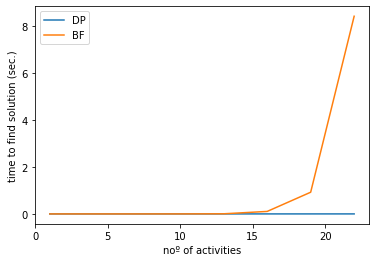

In [ ]:
import matplotlib.pyplot as plt

plt.plot(n, DP_times)
plt.plot(n, BF_times)
plt.xlabel("noº of activities")
plt.ylabel("time to find solution (sec.)")
plt.legend(('DP', 'BF'))
plt.show()

# Computational Critique

A strength of this algorithm is its obvious superiority both in run time and space complexity compared to a brute force approach. It is much more efficient on both metrics.

A weakness of the DP approach is that it can only identify one unique solution in terms of the schedule outputs. That is, if slightly adjusted, the brute force algorithm would be able to output every combination that leads to the optimal output if there are for example two optimal combinations. The dynamic approach of tracing back from the top right corner reconstructs the best schedule backwards which means that the schedule outputted is input dependent if there are two different schedules that are possible. This is why in my brute force vs. dynammic programming check above, we had to compare simply the profits not the actual schedule. The chance of multiple schedules being optimal increases with the number of unique profits and lengths of activities. 

The weakness of unit dependency is described in the complexity analysis. This dependency, however, also has direct implications on the practical inputs that are allowed in the scheduler because the length of an activity has to be a whole number as the numpy array used to memoize the schedule cannot have "partially filled" cells. 